In [1]:
# Import packages for data manipulation
import pandas as pd # data manipulation 
import numpy as np # scientific/numeric manipulation

1.	Importer la base de données « pleuresie »  dans votre environnement de travail et nommer cette base « data » après importation. Montrer la preuve de la réussite de l’importation. 
Cette table de données est disponible à l’adresse URL : https://raw.githubusercontent.com/pefura/IFPERA/main/base_pleuresie.csv


In [2]:
dataset= pd.read_csv("https://raw.githubusercontent.com/pefura/IFPERA/main/base_pleuresie.csv", encoding ="iso-8859-2", sep=";", decimal = ",")

In [3]:
data = dataset.copy()

In [4]:
data.shape

(240, 10)

In [5]:
data.head()

,Ageannée,Sexe,Vih,Poids,Taille,proteinespleurales,CRPpleurale,LDHpleurale,glucosepleural,TbPleu
0,51,2,1,40.0,1.53,44.3,32.80,1243,0.72,1
1,67,2,0,40.0,1.66,47.5,34.75,744,0.89,1
2,42,1,0,44.0,1.72,38.0,5.97,724,0.44,1
3,30,2,1,45.0,1.73,36.5,113.22,417,0.86,1
4,24,2,0,45.0,1.60,52.2,30.00,1118,1.24,1


In [7]:
data.dtypes

Ageannée                int64
Sexe                    int64
Vih                     int64
Poids                 float64
Taille                float64
proteinespleurales    float64
CRPpleurale           float64
LDHpleurale             int64
glucosepleural        float64
TbPleu                  int64
dtype: object

In [8]:
data.isnull().any()

Ageannée              False
Sexe                  False
Vih                   False
Poids                 False
Taille                False
proteinespleurales    False
CRPpleurale           False
LDHpleurale           False
glucosepleural        False
TbPleu                False
dtype: bool

In [10]:
# Correction of dtytpes
data[['Sexe','Vih', 'TbPleu']] = data[['Sexe','Vih', 'TbPleu']].astype('category')
data.dtypes

Ageannée                 int64
Sexe                  category
Vih                   category
Poids                  float64
Taille                 float64
proteinespleurales     float64
CRPpleurale            float64
LDHpleurale              int64
glucosepleural         float64
TbPleu                category
dtype: object


2.	Calculer l’indice de masse corporelle (IMC) de l’ensemble de participants et créer une base de données « data_1 » comprenant l’IMC et toutes les variables de « data » sauf le poids et la taille. 


In [11]:
data['IMC'] = data['Poids']/(data['Taille']**2)
data_1 = data.drop(columns =['Poids','Taille'])
data_1.describe()

,Ageannée,proteinespleurales,CRPpleurale,LDHpleurale,glucosepleural,IMC
count,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000
mean,46.316667,47.46600,47.715875,1055.687500,2.183042,21.924493
std,16.726189,11.89556,30.149106,1350.111868,20.214752,3.950522
min,16.000000,30.10000,3.000000,221.000000,0.130000,14.515895
25%,33.000000,38.00000,25.920000,512.000000,0.680000,19.586798
50%,46.000000,45.55000,42.400000,703.000000,0.860000,21.078542
75%,58.000000,55.12500,58.665000,1082.750000,1.020000,23.009684
max,94.000000,111.80000,179.880000,15850.000000,314.000000,39.111111


Les données de data_1 seront utilisées pour développer les modèles de classification. 
Dans la suite du devoir, il est question de développer les modèles de machine learning capables de distinguer les malades ayant une tuberculose pleurale de ceux qui n’ont pas de tuberculose pleurale. 


3.	Installer la bibliothèque (ou la librairie) «scikit-learn » et montrer la preuve de la réussite d’installation. Toutes les informations utiles pour l’utilisation de cette librairie sont disponibles à l’adresse : https://scikit-learn.org/stable/


In [12]:
# Example, import a module to split dataset in train set and test set
from sklearn.model_selection import train_test_split

In [13]:
# Defining target(y) and features (X)
y = data_1['TbPleu']
X = data_1.drop(columns =['TbPleu'])

print("X:", list(data_1.columns))
print("X shape:", X.shape)
print("y shape:", y.shape)

X: ['Ageannée', 'Sexe', 'Vih', 'proteinespleurales', 'CRPpleurale', 'LDHpleurale', 'glucosepleural', 'TbPleu', 'IMC']
X shape: (240, 8)
y shape: (240,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, 
                                                    stratify=y, random_state=0 )

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (192, 8)
y_train shape: (192,)
X_test shape: (48, 8)
y_test shape: (48,)


In [15]:
X_train.columns


Index(['Ageannée', 'Sexe', 'Vih', 'proteinespleurales', 'CRPpleurale',
       'LDHpleurale', 'glucosepleural', 'IMC'],
      dtype='object')

In [16]:
(y_train.value_counts()/len(y_train))*100  # échantillon déséquilibré avec 2/3 dans la classe 1(Tb)
# Choix de métrique important si jeu de données original utilisé (AUC, score F1)

1    67.1875
0    32.8125
Name: TbPleu, dtype: float64

In [17]:
(y_test.value_counts()/len(y_test))*100 

1    66.666667
0    33.333333
Name: TbPleu, dtype: float64

4.	Expliquer les bases du modèle de classification « d’arbre de décision » ou « decision tree ».

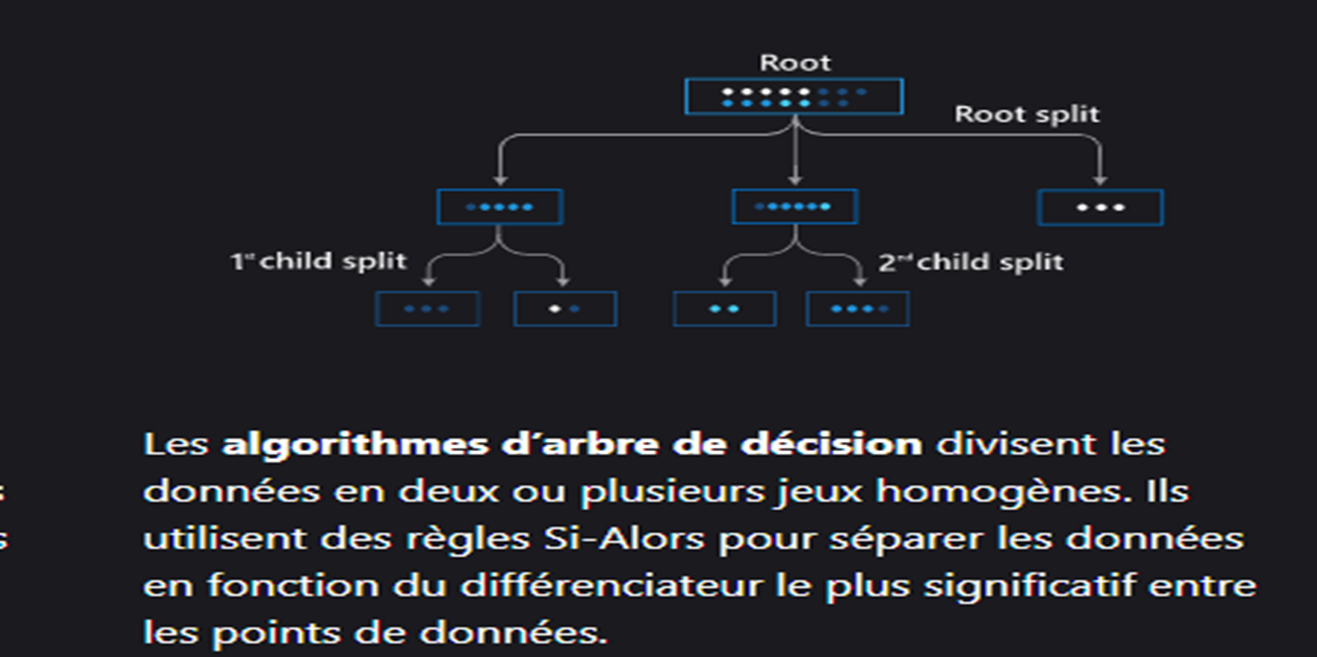

Algorithme de pris
e de décision: Algorithme CART (Classification And Regression Trees )
Fonction coût: impureté de Gini, entropie, log loss
Objectif: minimiser les métriques
Utilisation: classification, régression
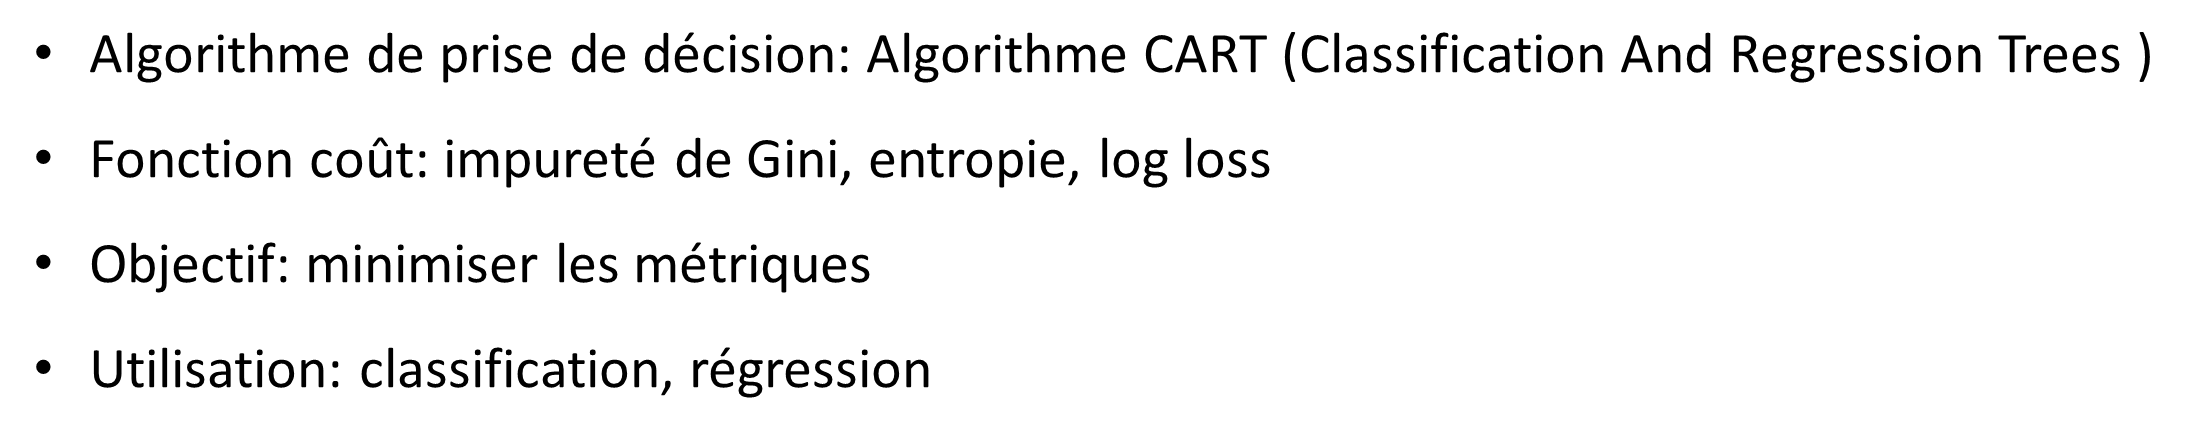


In [88]:
y1 = data_1['TbPleu']
X1 = data_1[['Vih', 'Sexe']]

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(0.21306818181818182, 0.9583333333333334, 'X[4] <= 12.39\ngini = 0.441\nsamples = 192\nvalue = [63, 129]'),
 Text(0.06818181818181818, 0.875, 'X[3] <= 60.1\ngini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.045454545454545456, 0.7916666666666666, 'X[7] <= 16.103\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.022727272727272728, 0.7083333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06818181818181818, 0.7083333333333334, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.09090909090909091, 0.7916666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.35795454545454547, 0.875, 'X[0] <= 37.5\ngini = 0.398\nsamples = 175\nvalue = [48, 127]'),
 Text(0.13636363636363635, 0.7916666666666666, 'X[6] <= 1.44\ngini = 0.17\nsamples = 64\nvalue = [6, 58]'),
 Text(0.11363636363636363, 0.7083333333333334, 'X[3] <= 36.25\ngini = 0.121\nsamples = 62\nvalue = [4, 58]'),
 Text(0.045454545454545456, 0.625, 'X[0] <= 27.0\ngini = 0.444\nsamples = 9\nvalue = [

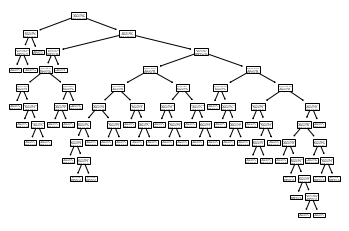

In [83]:
 tree.plot_tree(clf)

In [93]:
from sklearn.tree import export_text
r = export_text(clf, feature_names= list(X_train.columns))
print(r)

|--- CRPpleurale <= 12.39
|   |--- proteinespleurales <= 60.10
|   |   |--- IMC <= 16.10
|   |   |   |--- class: 1
|   |   |--- IMC >  16.10
|   |   |   |--- class: 0
|   |--- proteinespleurales >  60.10
|   |   |--- class: 1
|--- CRPpleurale >  12.39
|   |--- Ageannée <= 37.50
|   |   |--- glucosepleural <= 1.44
|   |   |   |--- proteinespleurales <= 36.25
|   |   |   |   |--- Ageannée <= 27.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Ageannée >  27.00
|   |   |   |   |   |--- glucosepleural <= 0.73
|   |   |   |   |   |   |--- Vih <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Vih >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- glucosepleural >  0.73
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- proteinespleurales >  36.25
|   |   |   |   |--- LDHpleurale <= 513.00
|   |   |   |   |   |--- LDHpleurale <= 493.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- LDHpleurale >  493.50
|   |   

5.	Expliquer les bases du modèle de classification « Random Forest».


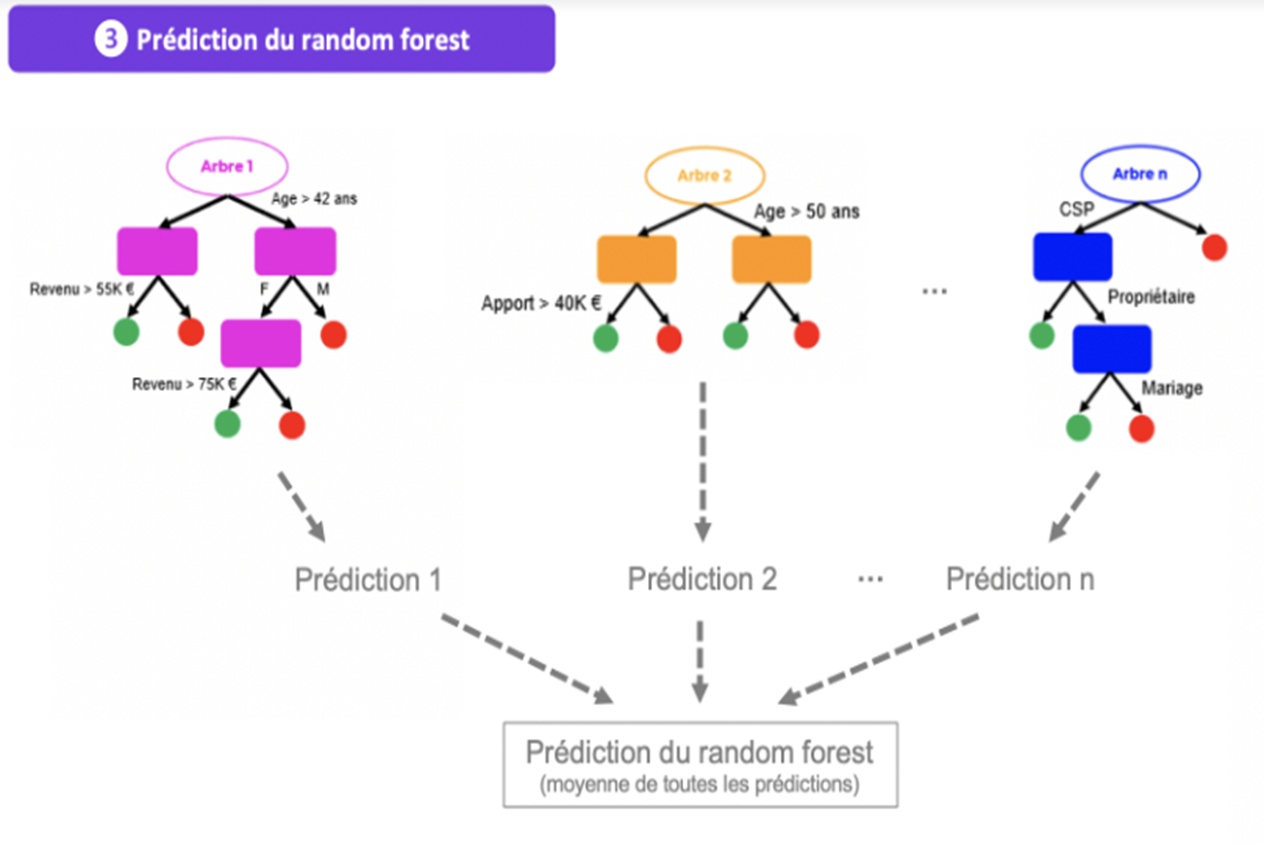

6.	Développer et Evaluer un modèle de « Random Forest» pour prédire le diagnostic de la tuberculose pleurale.

In [20]:
# Initialisation et choix du modèle
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier (random_state=0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [25]:
# Recherche des hyperparamètres optimaux
from sklearn.model_selection import RandomizedSearchCV
# Définir la plage des hyperparamètres
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))

# Configurer la recherche aléatoire
Rand_CV = RandomizedSearchCV(RF_model, distributions, random_state=0, scoring = 'f1')
search =  Rand_CV.fit(X_train, y_train)
 
search.best_params_  # Meilleurs paramètres

{'n_estimators': 499, 'max_depth': 5}

In [29]:
# Calcul du score obtenu durant la validation croisée pour le modèle de base
from sklearn.model_selection import cross_val_score

cross_validation =10 
score_f1 = cross_val_score(RF_model, X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(RF_model, X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC:', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC:', '{:.3f}'.format(np.std(score_auc)))

score folds F1
[0.76923077 0.71428571 0.88       0.85714286 0.89655172 0.81481481
 0.89655172 0.89655172 0.78571429 0.75862069]
Mean CV F1 0.827
standard deviation CV F1 0.064
####################################################################
score folds AUC
[0.73076923 0.64835165 0.8452381  0.80769231 0.75641026 0.75641026
 0.83974359 0.91025641 0.69230769 0.51923077]
Mean CV AUC: 0.751
standard deviation CV AUC: 0.107


In [21]:
# Entraînement avec les hyperparamètres optimaux
RF_model_final = RandomForestClassifier(n_estimators = 499, max_depth= 5, random_state=0)
RF_model_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=499, random_state=0)

In [22]:
# Calcul du score obtenu durant la validation croisée pour le modèle de RF avce les hyperparamètres optimaux
cross_validation =10
score_f1_final = cross_val_score(RF_model_final, X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc_final = cross_val_score(RF_model_final, X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1 final')
print(score_f1_final)
print('Mean CV F1 final', '{:.3f}'.format(score_f1_final.mean()))
print('standard deviation CV F1 final', '{:.3f}'.format(np.std(score_f1_final)))
print('####################################################################')

print('score folds AUC final')
print(score_auc_final)
print('Mean CV AUC final:', '{:.3f}'.format(score_auc_final.mean()))
print('standard deviation CV AUC final:', '{:.3f}'.format(np.std(score_auc_final)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

score folds F1 final
[0.81481481 0.75       0.84615385 0.85714286 0.86666667 0.82758621
 0.83870968 0.92857143 0.81481481 0.8       ]
Mean CV F1 final 0.834


<IPython.core.display.Javascript object>

standard deviation CV F1 final 0.044
####################################################################
score folds AUC final
[0.67032967 0.71428571 0.8452381  0.76923077 0.67948718 0.78205128
 0.88461538 0.93589744 0.75641026 0.62820513]
Mean CV AUC final: 0.767


<IPython.core.display.Javascript object>

standard deviation CV AUC final: 0.094


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Optimazed Random Forest model')

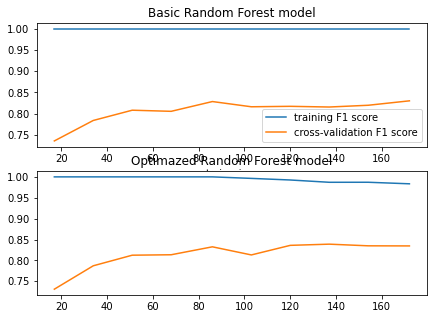

In [43]:
# Learning curve of RF 
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(RF_model, X_train, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

N_final, train_score_final, val_score_final = learning_curve(RF_model_final, X_train, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.figure(figsize=(7, 5))
plt.subplot(211)
plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.title("Basic Random Forest model")
#plt.xlabel('train_sizes')
plt.legend()

plt.subplot(212)
plt.plot(N_final, train_score_final.mean(axis=1), label='training F1 score')
plt.plot(N_final, val_score_final.mean(axis=1), label='cross-validation F1 score')
plt.title("Optimized Random Forest model")
plt.xlabel('train_sizes')
#plt.legend()

In [23]:
# Learning curve of RF 
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(RF_model, X_train, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

N_final, train_score_final, val_score_final = learning_curve(RF_model_final, X_train, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

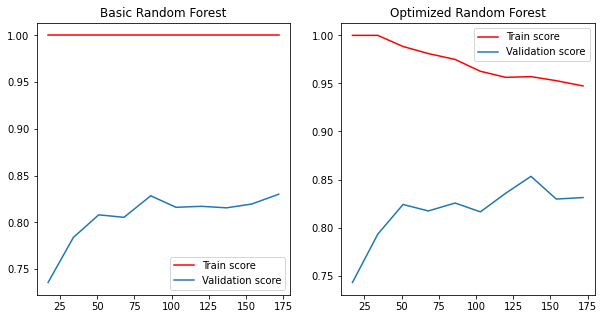

In [24]:

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2, figsize=(10, 5))

# For Random Forest
axis[0].plot(N, train_score.mean(axis=1), color = "red")    
axis[0].plot(N, val_score.mean(axis=1))
axis[0].set_title("Basic Random Forest")
axis[0].legend(['Train score', 'Validation score'])
axis[0].grid(visible = None)
# For optimized random Forest
axis[1].plot(N_final, train_score_final.mean(axis=1), color = "red")
axis[1].plot(N_final, val_score_final.mean(axis=1))
axis[1].set_title("Optimized Random Forest")
axis[1].legend(['Train score', 'Validation score'])
axis[1].grid(visible = None)


In [34]:
def evaluation(model, X_test=X_test):
    # Importer les modules nécessaires pour le calcul des métriques
    from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
    from imblearn.metrics import specificity_score
    # Prédictions sur les données du test set
    ypred = model.predict(X_test)
    # Calcul de l'AUC et spécificité
    model_probs = model.predict_proba(X_test)
    model_probs = model_probs[:, 1]
    model_auc = roc_auc_score(y_test, model_probs)
    spe = specificity_score(y_test, ypred, average=None)
    # Matrice de confuson et scores associés dont F1
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print("SPECIFICITY")
    print(spe)
    print("AUROC")
    print(model_auc)

In [126]:
print("Random forest basic model")
evaluation(model=RF_model)

Random forest basic model
CONFUSION MATRIX
[[11  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.84      0.84      0.84        32

    accuracy                           0.79        48
   macro avg       0.77      0.77      0.77        48
weighted avg       0.79      0.79      0.79        48

SPECIFICITY
[0.84375 0.6875 ]
AUROC
0.849609375


In [124]:
print("Random forest final model")
evaluation(model=RF_model_final)

Random forest final model
CONFUSION MATRIX
[[12  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.88      0.91      0.89        32

    accuracy                           0.85        48
   macro avg       0.84      0.83      0.83        48
weighted avg       0.85      0.85      0.85        48

SPECIFICITY
[0.90625 0.75   ]
AUROC
0.853515625


7.	Développer et Evaluer un modèle de « Régression logistique» pour prédire  le diagnostic de la tuberculose pleurale. 
- Encodage et normalisation des données nécessaires

In [25]:
numerical_features = ['Ageannée','proteinespleurales', 'CRPpleurale','LDHpleurale', 'glucosepleural', 'IMC']
categorical_features = ['Sexe', 'Vih']

# On doit encoder les variables qualitatives en numérique[oui/non en 1/0] et pour certains algorithmes il 
# est nécessaire de normaliser les données
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

# Construire les pipelines qui vont permettre de faire les transformations succèssives de chaque type de variables
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [26]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=0)

In [27]:
column_trans = make_column_transformer((OneHotEncoder(), categorical_features),
                                       remainder = RobustScaler())
column_trans


ColumnTransformer(remainder=RobustScaler(),
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['Sexe', 'Vih'])])

In [111]:
column_trans.fit_transform(X_train).shape

(192, 10)

In [29]:
X_train_trans = column_trans.fit_transform(X_train)

In [247]:
X_train

,Ageannée,Sexe,Vih,proteinespleurales,CRPpleurale,LDHpleurale,glucosepleural,IMC
177,28,2,1,37.7,8.42,359,0.97,22.985398
98,34,2,0,50.8,89.78,1329,0.55,19.369835
16,51,1,0,55.6,52.80,515,1.74,19.531250
182,30,1,0,58.0,21.81,563,1.00,21.461937
65,51,2,0,35.7,8.78,314,0.86,19.379197
...,...,...,...,...,...,...,...,...
159,65,1,0,36.6,30.70,876,2.22,22.145329
160,53,1,0,38.7,30.00,750,0.59,21.887076
28,45,1,0,31.9,51.77,974,0.61,19.467401
176,32,1,0,57.4,43.73,512,0.72,21.877551


In [112]:
pd.DataFrame(column_trans.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,1.0,-0.642857,-0.435036,-1.056038,-0.649976,0.341085,0.706368
1,0.0,1.0,1.0,0.0,-0.428571,0.329927,1.359460,1.182806,-0.961240,-0.460514
2,1.0,0.0,1.0,0.0,0.178571,0.610219,0.261560,-0.355220,2.728682,-0.408419
3,1.0,0.0,1.0,0.0,-0.571429,0.750365,-0.658502,-0.264525,0.434109,0.214688
4,0.0,1.0,1.0,0.0,0.178571,-0.551825,-1.045350,-0.735002,0.000000,-0.457493
...,...,...,...,...,...,...,...,...,...,...
187,1.0,0.0,1.0,0.0,0.678571,-0.499270,-0.394567,0.326878,4.217054,0.435245
188,1.0,0.0,1.0,0.0,0.250000,-0.376642,-0.415349,0.088805,-0.837209,0.351897
189,1.0,0.0,1.0,0.0,-0.035714,-0.773723,0.230980,0.512045,-0.775194,-0.429026
190,1.0,0.0,1.0,0.0,-0.500000,0.715328,-0.007719,-0.360888,-0.434109,0.348823


In [30]:
# Définir la plage des hyperparamètres
distributions = dict(penalty = ['l1', 'l2', 'elasticnet', None],
                     max_iter=np.arange(1000,10000),
                     solver= ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])

# Configurer la recherche aléatoire
Rand_CV = RandomizedSearchCV(logistic_model, distributions, random_state=0, scoring = 'f1')
search =  Rand_CV.fit(X_train_trans, y_train)
 
search.best_params_  # Meilleurs paramètres

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 55, in _check_solver
    raise ValueError(
ValueError: Lo

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 8373}

In [31]:
column_scale = make_column_transformer(('passthrough', categorical_features),
    (RobustScaler(),  numerical_features))
column_scale

ColumnTransformer(transformers=[('passthrough', 'passthrough', ['Sexe', 'Vih']),
                                ('robustscaler', RobustScaler(),
                                 ['Ageannée', 'proteinespleurales',
                                  'CRPpleurale', 'LDHpleurale',
                                  'glucosepleural', 'IMC'])])

In [272]:
X_train.columns

Index(['Ageannée', 'Sexe', 'Vih', 'proteinespleurales', 'CRPpleurale',
       'LDHpleurale', 'glucosepleural', 'IMC'],
      dtype='object')

In [275]:
X_train

,Ageannée,Sexe,Vih,proteinespleurales,CRPpleurale,LDHpleurale,glucosepleural,IMC
177,28,2,1,37.7,8.42,359,0.97,22.985398
98,34,2,0,50.8,89.78,1329,0.55,19.369835
16,51,1,0,55.6,52.80,515,1.74,19.531250
182,30,1,0,58.0,21.81,563,1.00,21.461937
65,51,2,0,35.7,8.78,314,0.86,19.379197
...,...,...,...,...,...,...,...,...
159,65,1,0,36.6,30.70,876,2.22,22.145329
160,53,1,0,38.7,30.00,750,0.59,21.887076
28,45,1,0,31.9,51.77,974,0.61,19.467401
176,32,1,0,57.4,43.73,512,0.72,21.877551


In [32]:
X_train_scale =column_scale.fit_transform(X_train)
                                          
X_train_scale= pd.DataFrame(X_train_scale, columns= [ 'Sexe', 'Vih','Ageannée', 'proteinespleurales', 'CRPpleurale',
       'LDHpleurale', 'glucosepleural', 'IMC'])   
X_train_scale

,Sexe,Vih,Ageannée,proteinespleurales,CRPpleurale,LDHpleurale,glucosepleural,IMC
0,2.0,1.0,-0.642857,-0.435036,-1.056038,-0.649976,0.341085,0.706368
1,2.0,0.0,-0.428571,0.329927,1.359460,1.182806,-0.961240,-0.460514
2,1.0,0.0,0.178571,0.610219,0.261560,-0.355220,2.728682,-0.408419
3,1.0,0.0,-0.571429,0.750365,-0.658502,-0.264525,0.434109,0.214688
4,2.0,0.0,0.178571,-0.551825,-1.045350,-0.735002,0.000000,-0.457493
...,...,...,...,...,...,...,...,...
187,1.0,0.0,0.678571,-0.499270,-0.394567,0.326878,4.217054,0.435245
188,1.0,0.0,0.250000,-0.376642,-0.415349,0.088805,-0.837209,0.351897
189,1.0,0.0,-0.035714,-0.773723,0.230980,0.512045,-0.775194,-0.429026
190,1.0,0.0,-0.500000,0.715328,-0.007719,-0.360888,-0.434109,0.348823


In [35]:
X_train_scale =column_scale.fit_transform(X_train)
X_train_scale= pd.DataFrame(X_train_scale, columns= [ 'Sexe', 'Vih','Ageannée', 'proteinespleurales', 'CRPpleurale',
       'LDHpleurale', 'glucosepleural', 'IMC'])  

X_test_scale = column_scale.transform(X_test)
logistic_model_scale = LogisticRegression(random_state=0)
logistic_model_scale.fit(X_train_scale, y_train)
evaluation(model = logistic_model_scale, X_test = X_test_scale)

CONFUSION MATRIX
[[12  4]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.88      0.94      0.91        32

    accuracy                           0.88        48
   macro avg       0.87      0.84      0.85        48
weighted avg       0.87      0.88      0.87        48

SPECIFICITY
[0.9375 0.75  ]
AUROC
0.890625


C:\Users\DDD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
X_train_trans =column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)
logistic_model.fit(X_train_trans, y_train)
evaluation(model = logistic_model, X_test = X_test_trans)

CONFUSION MATRIX
[[12  4]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.88      0.94      0.91        32

    accuracy                           0.88        48
   macro avg       0.87      0.84      0.85        48
weighted avg       0.87      0.88      0.87        48

SPECIFICITY
[0.9375 0.75  ]
AUROC
0.890625


In [45]:
logistic_model_final =LogisticRegression(solver= 'saga', penalty= 'l2',max_iter= 8373, random_state=0)
logistic_model_final.fit(X_train_trans, y_train)
evaluation(model = logistic_model_final, X_test = X_test_trans)

CONFUSION MATRIX
[[12  4]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.88      0.94      0.91        32

    accuracy                           0.88        48
   macro avg       0.87      0.84      0.85        48
weighted avg       0.87      0.88      0.87        48

SPECIFICITY
[0.9375 0.75  ]
AUROC
0.890625


In [57]:
# Prediction dans avec X_test
X_test_scale = column_trans.transform(X_test)
logistic_model_final.predict(X_test_scale)

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [243]:
# Learning curve for logistic regression
N, train_score_LR, val_score_LR = learning_curve(logistic_model, X_train_trans, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

N_final, train_score_final_LR, val_score_final_LR = learning_curve(logistic_model_final, X_train_trans, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

<IPython.core.display.Javascript object>

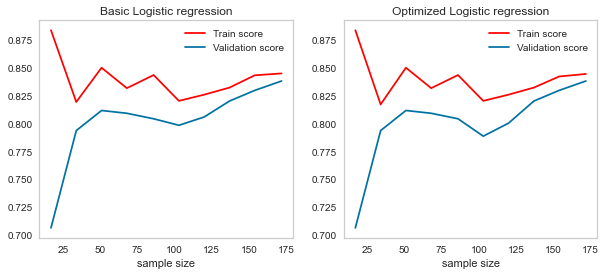

In [245]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2, figsize=(10, 4))

# For Random Forest

axis[0].plot(N, train_score_LR.mean(axis=1), linestyle='-', color = "red")    
axis[0].plot(N, val_score_LR.mean(axis=1))
axis[0].set_title("Basic Logistic regression")
axis[0].set_xlabel("sample size")
axis[0].legend(['Train score', 'Validation score'])
axis[0].grid(visible=None)

# For optimized random Forest
axis[1].plot(N_final, train_score_final_LR.mean(axis=1), color = "red")
axis[1].plot(N_final, val_score_final_LR.mean(axis=1))
axis[1].set_title("Optimized Logistic regression")
axis[1].set_xlabel("sample size")
axis[1].legend(['Train score', 'Validation score'])
axis[1].grid(visible=None)

In [54]:
# Le satcking Random forest et logistic regression marche moins bien.
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', logistic_model_final),]

clf = StackingClassifier(
    estimators=estimators, final_estimator=RF_model_final)

In [55]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('LR',
                                LogisticRegression(max_iter=8373,
                                                   random_state=0,
                                                   solver='saga'))],
                   final_estimator=RandomForestClassifier(max_depth=5,
                                                          n_estimators=499,
                                                          random_state=0))

In [56]:
evaluation(model=clf, X_test= X_test)

CONFUSION MATRIX
[[10  6]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.65        16
           1       0.82      0.84      0.83        32

    accuracy                           0.77        48
   macro avg       0.74      0.73      0.74        48
weighted avg       0.77      0.77      0.77        48

SPECIFICITY
[0.84375 0.625  ]
AUROC
0.8134765625


In [ ]:
Stacking

8.	Comparer les deux modèles développés ci-dessus. 
- La regression logistique est le meilleur modèle que ça soit sur le score F1 ou l'AUC

9.	Faire une sélection des variables pertinentes expliquant le meilleur modèle.

In [163]:
from yellowbrick.model_selection import FeatureImportances

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


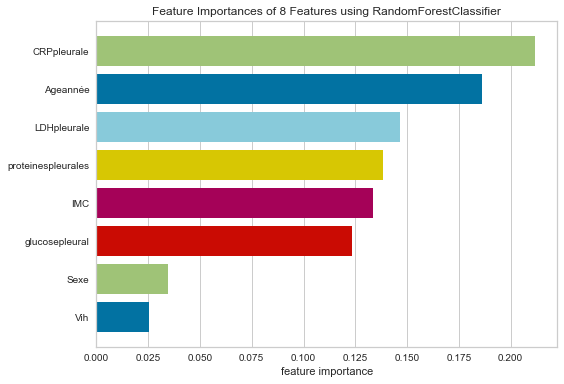

<AxesSubplot:title={'center':'Feature Importances of 8 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [295]:
viz = FeatureImportances(RF_model_final,relative = False)
viz.fit(X_train, y_train)
viz.show()

In [262]:
X_train

,Ageannée,Sexe,Vih,proteinespleurales,CRPpleurale,LDHpleurale,glucosepleural,IMC
177,28,2,1,37.7,8.42,359,0.97,22.985398
98,34,2,0,50.8,89.78,1329,0.55,19.369835
16,51,1,0,55.6,52.80,515,1.74,19.531250
182,30,1,0,58.0,21.81,563,1.00,21.461937
65,51,2,0,35.7,8.78,314,0.86,19.379197
...,...,...,...,...,...,...,...,...
159,65,1,0,36.6,30.70,876,2.22,22.145329
160,53,1,0,38.7,30.00,750,0.59,21.887076
28,45,1,0,31.9,51.77,974,0.61,19.467401
176,32,1,0,57.4,43.73,512,0.72,21.877551


C:\Users\DDD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\DDD\anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


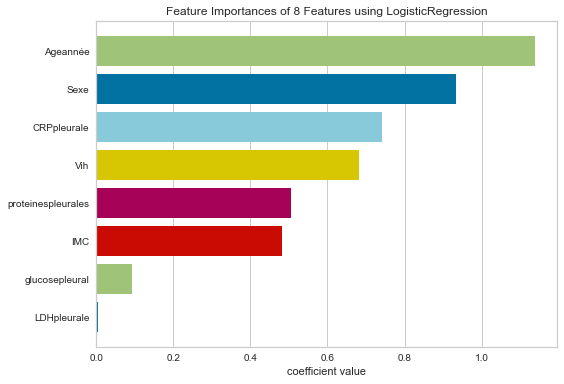

<AxesSubplot:title={'center':'Feature Importances of 8 Features using LogisticRegression'}, xlabel='coefficient value'>

In [299]:
viz = FeatureImportances(logistic_model_scale,relative = False, absolute=True)
viz.fit(X_train_scale, y_train)
viz.show()
#  ['Ageannée','proteinespleurales', 'CRPpleurale','LDHpleurale', 'glucosepleural', 'IMC']